# **TASK-3 : IRIS FLOWER CLASSIFICATION**

> MOHD FAZAL HUSSAIN

> Batch: APRIL B19

> Domain: Data Science

# *Importing Libraries*

In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# *Exploratory Data Analysis (EDA)*

In [6]:
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [9]:
iris.shape

(150, 5)

In [10]:
iris.describe

<bound method NDFrame.describe of      sepal_length  sepal_width  petal_length  petal_width    species
0             5.1          3.5           1.4          0.2     setosa
1             4.9          3.0           1.4          0.2     setosa
2             4.7          3.2           1.3          0.2     setosa
3             4.6          3.1           1.5          0.2     setosa
4             5.0          3.6           1.4          0.2     setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  virginica
146           6.3          2.5           5.0          1.9  virginica
147           6.5          3.0           5.2          2.0  virginica
148           6.2          3.4           5.4          2.3  virginica
149           5.9          3.0           5.1          1.8  virginica

[150 rows x 5 columns]>

In [12]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [14]:
iris.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

# DATA VISUALIZATION

In [16]:
sns.set_style("whitegrid")

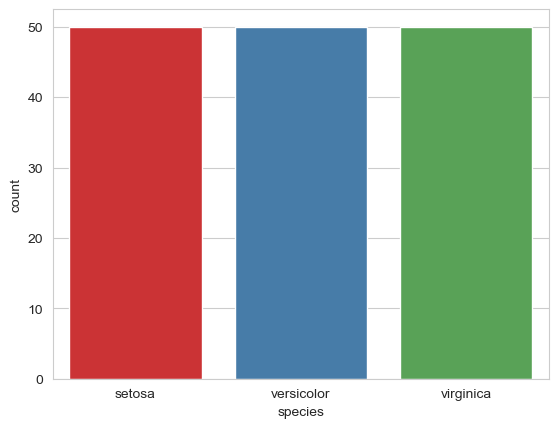

In [20]:
sns.countplot(x='species', hue = 'species', data=iris, palette = 'Set1')
plt.show()

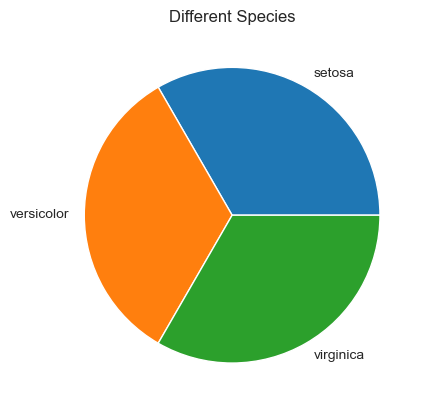

In [22]:
plt.pie(iris['species'].value_counts(),labels=iris['species'].value_counts().index)
plt.title("Different Species")
plt.show()

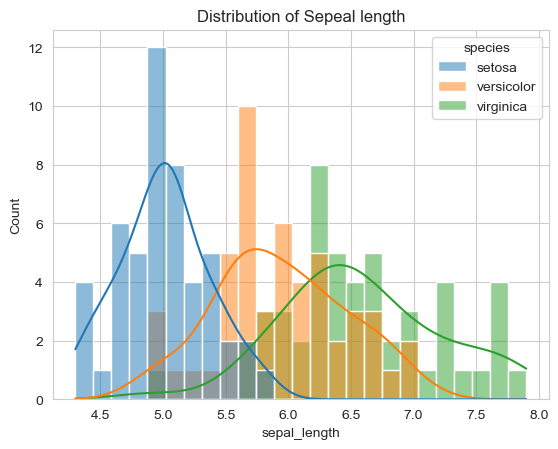

In [42]:
sns.histplot(data=iris, x=iris.sepal_length, bins=25, kde=True, hue='species')
plt.title("Distribution of Sepeal length")
plt.show()

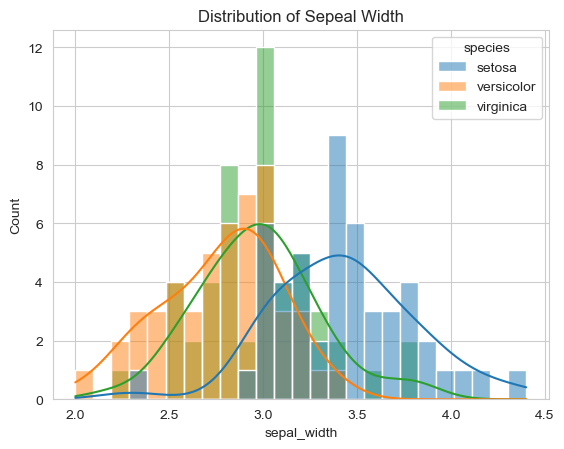

In [44]:
sns.histplot(data=iris, x=iris.sepal_width, bins=25, kde=True, hue='species')
plt.title("Distribution of Sepeal Width")
plt.show()

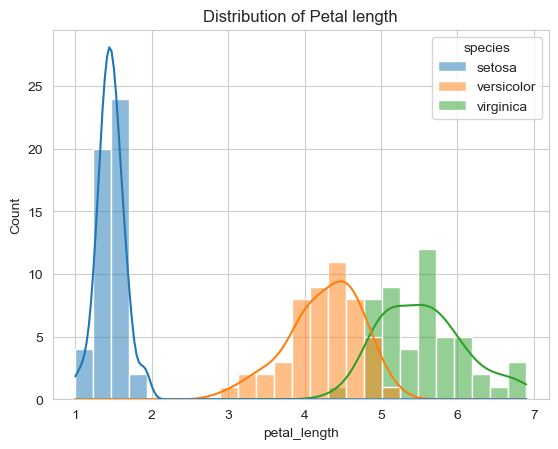

In [46]:
sns.histplot(data=iris, x=iris.petal_length, bins=25, kde=True, hue='species')
plt.title("Distribution of Petal length")
plt.show()

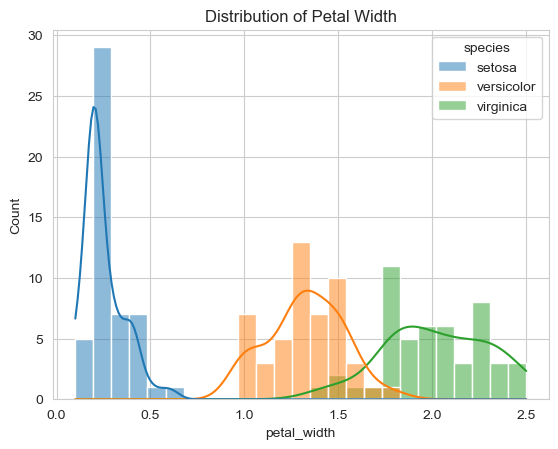

In [48]:
sns.histplot(data=iris, x=iris.petal_width, bins=25, kde=True, hue='species')
plt.title("Distribution of Petal Width")
plt.show()

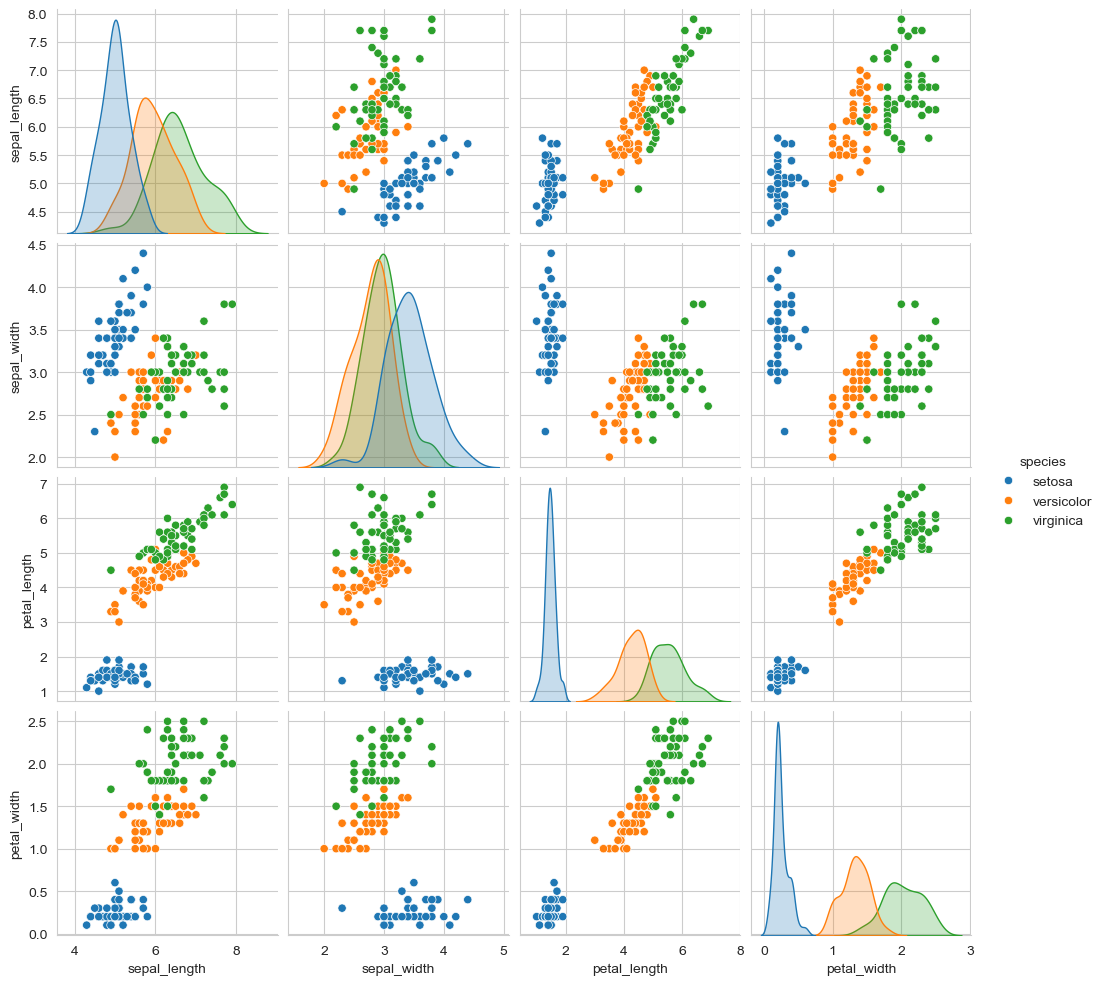

In [24]:
sns.pairplot(iris, hue='species')

In [52]:
iris['species'],categories = pd.factorize(iris['species'])
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


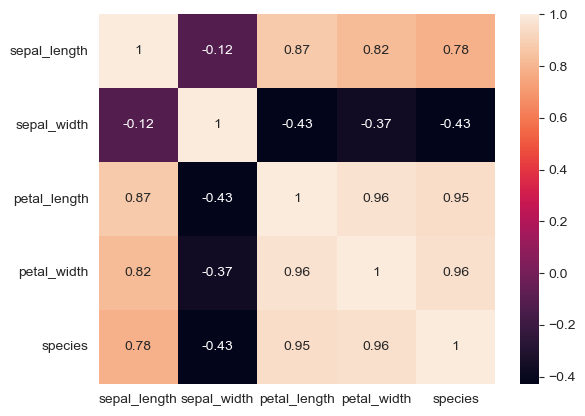

In [60]:
corr = iris.corr()
sns.heatmap(corr, annot=True)
plt.show()

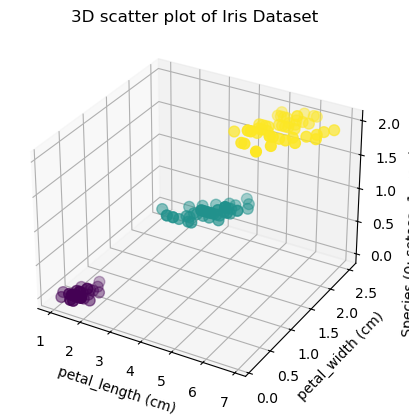

In [54]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(
    iris['petal_length'],
    iris['petal_width'],
    iris['species'],
    c=iris['species'],
    cmap='viridis',
    s=60
)
ax.set_xlabel('petal_length (cm)')
ax.set_ylabel('petal_width (cm)')
ax.set_zlabel('Species (0: setosa, 1: versicolor, 2: virginica)')
plt.title('3D scatter plot of Iris Dataset')
plt.show()

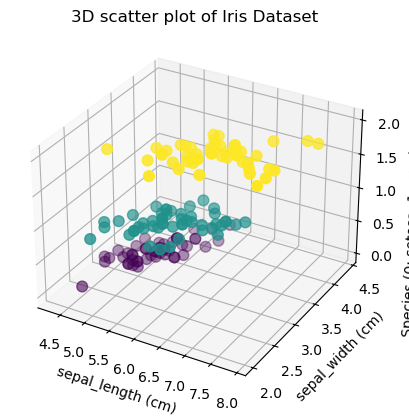

In [56]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(
    iris['sepal_length'],
    iris['sepal_width'],
    iris['species'],
    c=iris['species'],
    cmap='viridis',
    s=60
)
ax.set_xlabel('sepal_length (cm)')
ax.set_ylabel('sepal_width (cm)')
ax.set_zlabel('Species (0: setosa, 1: versicolor, 2: virginica)')
plt.title('3D scatter plot of Iris Dataset')
plt.show()

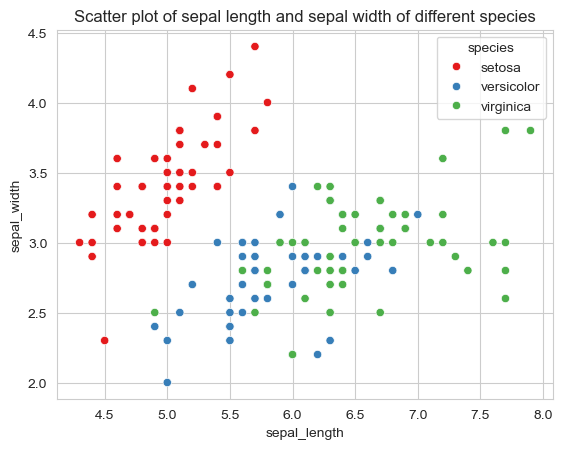

In [26]:
sns.scatterplot(data= iris, x = 'sepal_length', y = 'sepal_width', hue = 'species', palette= 'Set1')
plt.title("Scatter plot of sepal length and sepal width of different species")
plt.show()

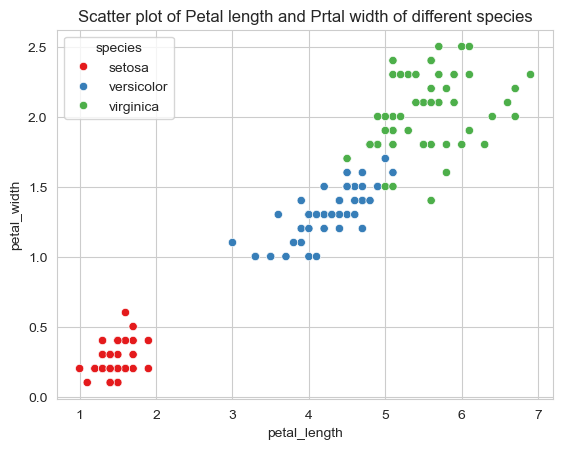

In [28]:
sns.scatterplot(data= iris, x = 'petal_length', y = 'petal_width', hue = 'species',palette= 'Set1')
plt.title("Scatter plot of Petal length and Prtal width of different species")
plt.show()

# Preparing the Data

In [27]:
X = iris.drop('species', axis=1)
y = iris['species']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training the Classification Model

In [30]:
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

LogisticRegression(max_iter=200)

# EVALUATE THE MODEL

In [32]:
y_pred = model.predict(X_test)

In [56]:
print("Accuracy of the model is:", accuracy_score(y_test, y_pred))

Accuracy of the model is: 1.0


In [58]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



# CONFUSION MATRIX

Confusion Matrix:


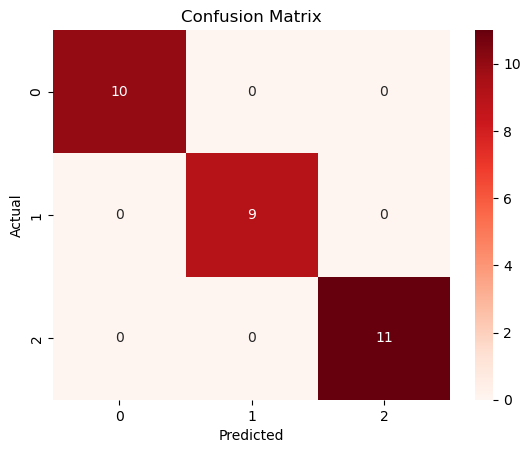

In [64]:
print("Confusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap='Reds', fmt='g')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# CONCLUSION

- The model achieved **100% accuracy** on the test set.
- All flowers were correctly classified into Setosa, Versicolor, and Virginica.
- Precision, Recall, and F1-score are all **perfect (1.00)** for each species.
- No errors or confusion were observed in the confusion matrix.
- Logistic Regression is an excellent choice for the Iris dataset due to its simplicity and effectiveness.

Therefore, the project successfully demonstrates the complete process of classification on a real-world dataset.